# MNIST omega|ml tutorial

Modified from the [scikit learn tutorial](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-download-auto-examples-classification-plot-digits-classification-py)

## Import the relevant libraries

In [1]:
import matplotlib.pyplot as plt

# Import the mnist dataset
# https://github.com/datapythonista/mnist
import mnist

# Import classifiers and performance metrics
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

import omegaml as ml

## Load the data

In [2]:
# The mnist dataset originally 28x18
images = mnist.train_images()
images.shape

(60000, 28, 28)

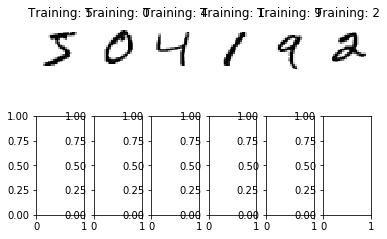

In [3]:
_, axes = plt.subplots(2, 6)
images_and_labels = list(zip(mnist.train_images(), mnist.train_labels()))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:6]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [4]:
mnist.train_labels()[:6]

array([5, 0, 4, 1, 9, 2], dtype=uint8)

In [5]:
# Flattening the images
full_data = images.reshape((images.shape[0], -1))
full_data.shape

(60000, 784)

In [6]:
# I use only part of the dataset

row_number = 50000

In [7]:
assert row_number<= min(full_data.shape[0], mnist.train_labels().shape[0]), 'The number of rows wanted is greater than the size of the full dataset.'

# data
data = full_data[:row_number, :]
data = data/255 # Normalising. https://aigeekprogrammer.com/keras-python-mnist-handwritten-digit-recognition/

# train_labels
full_train_labels = mnist.train_labels()
train_labels = full_train_labels[:row_number]

In [8]:
# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, train_labels, test_size=0.2, shuffle=False)

## Store the data on omega|ml